In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [176]:
df = pd.read_csv('ANN_Quiz_Data_Breast_Cancer.csv')

In [177]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [178]:
df.shape

(569, 31)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [180]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [181]:
df.isnull().sum().any()

False

In [182]:
df.duplicated().sum()

0

In [183]:
df.Target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: Target, dtype: float64

In [184]:
from sklearn.model_selection import train_test_split

x =  df.drop(['Target'], axis=1)
y =  df.pop('Target')

<AxesSubplot:>

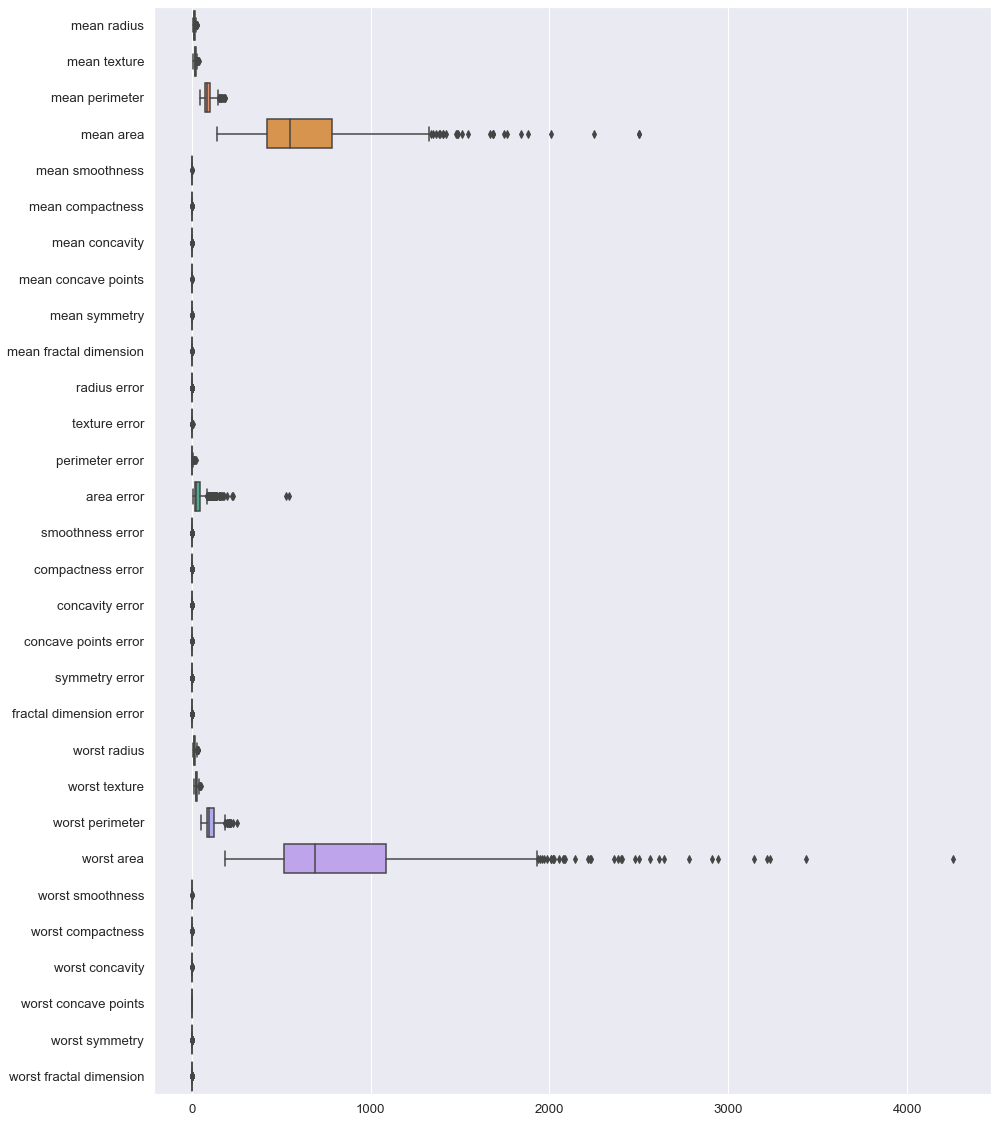

In [185]:
plt.figure(figsize=(15,20))
sns.boxplot(data=df,orient='h')

In [186]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [187]:
for i in df.columns:
    lrvalue,urvalue = remove_outlier(df[i])
    df[i] = np.where(df[i] > urvalue,urvalue,df[i])
    df[i] = np.where(df[i] < lrvalue,lrvalue,df[i])

<AxesSubplot:>

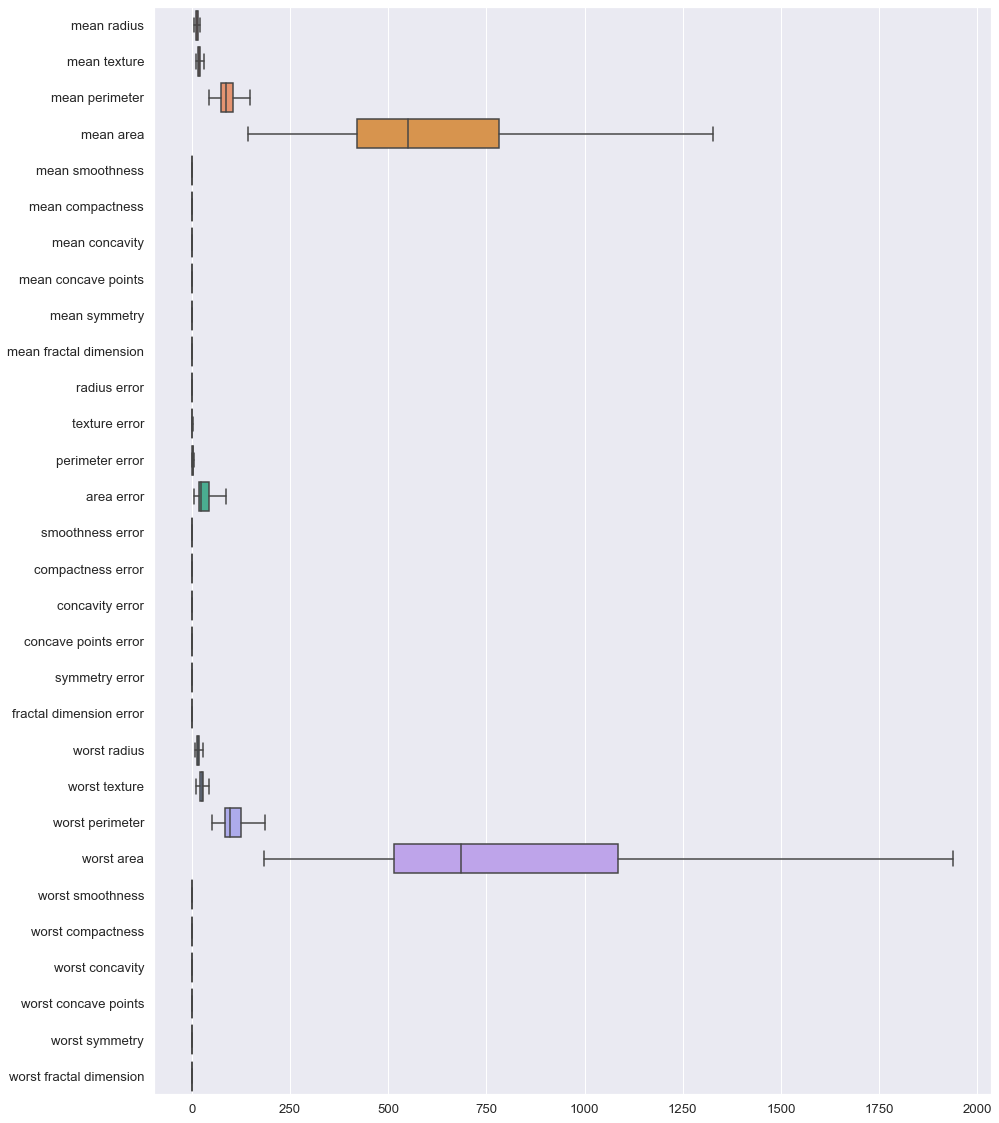

In [188]:
plt.figure(figsize=(15,20))
sns.boxplot(data=df, orient='h')

In [189]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.062916,19.254736,91.543787,639.765202,0.096266,0.103222,0.086937,0.048552,0.180734,0.062604,...,16.183882,25.648453,106.705369,849.907821,0.132209,0.249883,0.268754,0.114606,0.287616,0.083342
std,3.340025,4.187510,23.047218,305.343508,0.013685,0.049386,0.073900,0.037633,0.026067,0.006418,...,4.587249,6.054406,31.957777,475.645240,0.022320,0.142851,0.197461,0.065732,0.053868,0.015993
min,6.981000,9.710000,43.790000,143.500000,0.057975,0.019380,0.000000,0.000000,0.111200,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.072500,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


<AxesSubplot:>

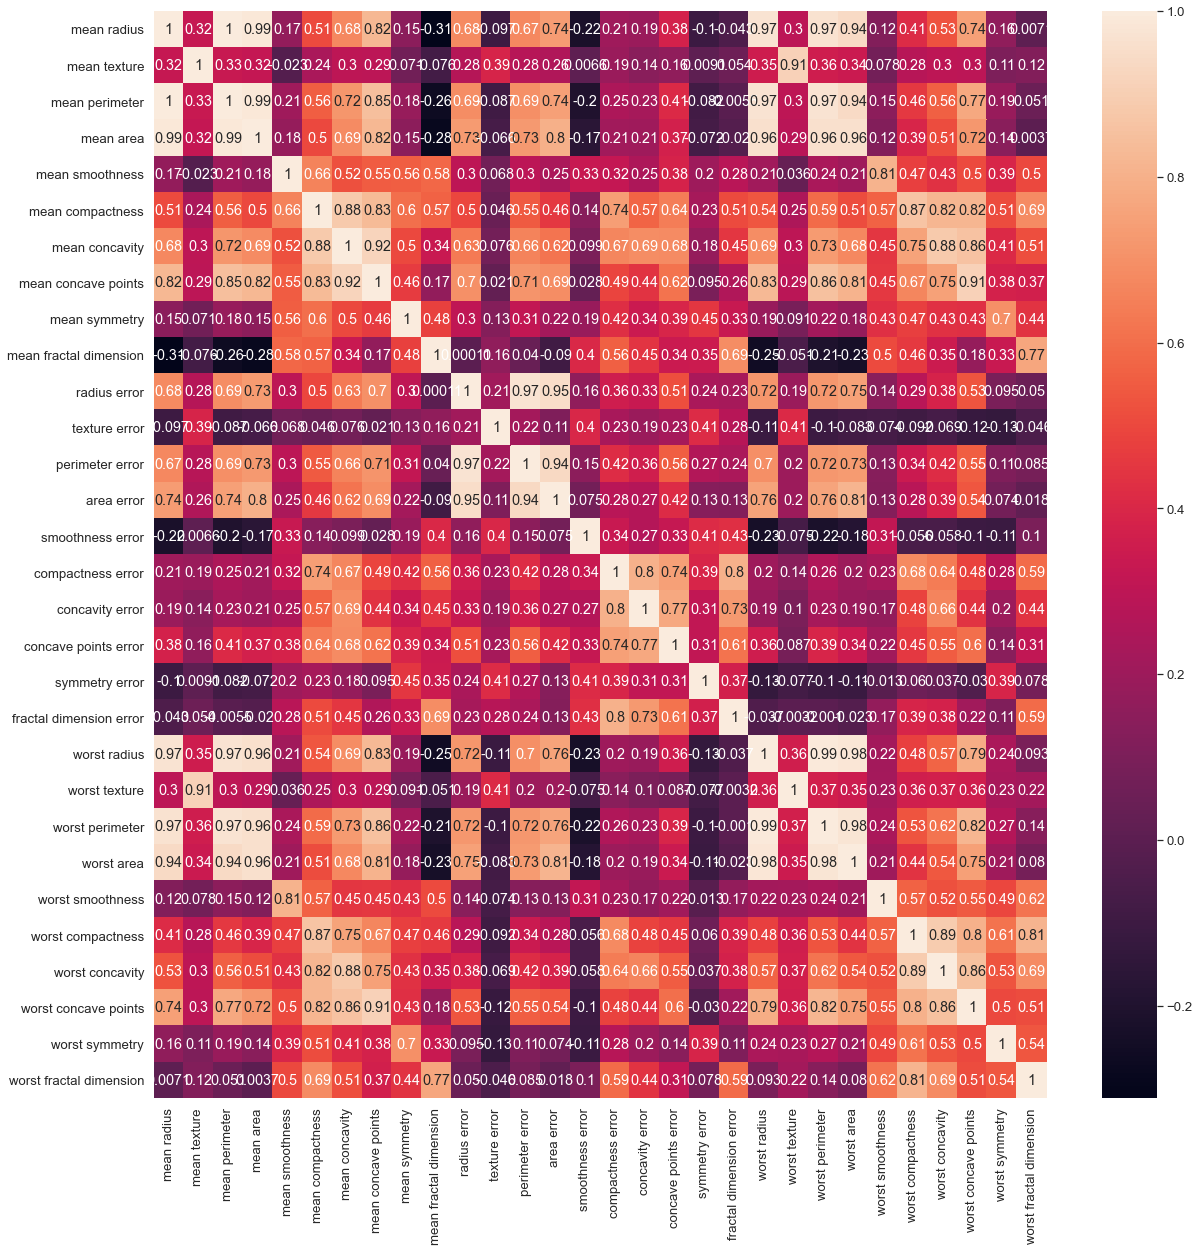

In [190]:
# construct heatmap with only continuous variables
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.heatmap(x.corr(), annot=True)

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20, random_state=0)

In [192]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (455, 30)
x_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
sc = StandardScaler()

In [195]:
x_trains = sc.fit_transform(x_train)

In [202]:
clf = MLPClassifier(hidden_layer_sizes=500, max_iter=5000, activation='relu',random_state=0, tol=0.0001)

In [203]:
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_train)

In [204]:
from sklearn.metrics import confusion_matrix, classification_report

In [205]:
confusion_matrix(y_train, y_pred1)

array([[135,  30],
       [  3, 287]], dtype=int64)

In [206]:
clf.score(x_train, y_train)

0.9274725274725275

In [207]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       165
           1       0.91      0.99      0.95       290

    accuracy                           0.93       455
   macro avg       0.94      0.90      0.92       455
weighted avg       0.93      0.93      0.93       455



AUC: 0.985


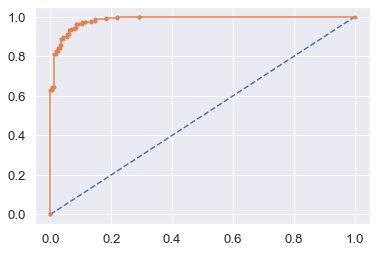

In [208]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [209]:
# TEST DATA

In [210]:
y_pred2 = clf.predict(x_test)

In [211]:
confusion_matrix(y_test, y_pred2)

array([[39,  8],
       [ 0, 67]], dtype=int64)

AUC: 0.972


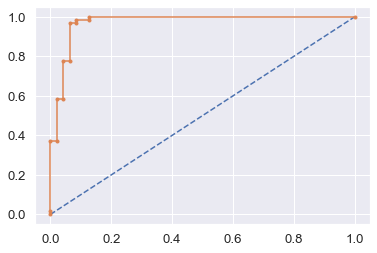

In [212]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [213]:
clf.score(x_test, y_test)

0.9298245614035088

In [143]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        47
           1       0.89      1.00      0.94        67

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.93      0.93       114



### Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [16]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No','Yes']
Quiz_Tree_File = open()